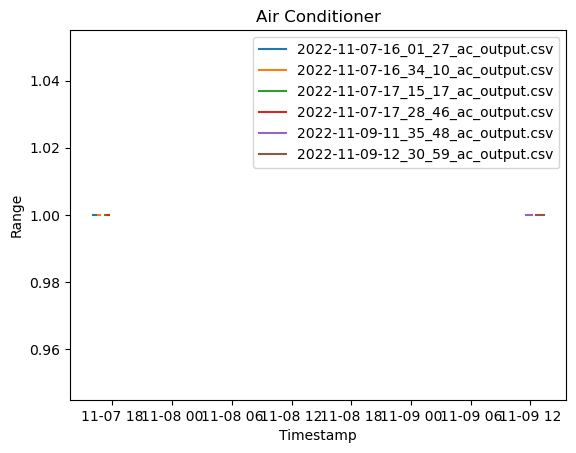

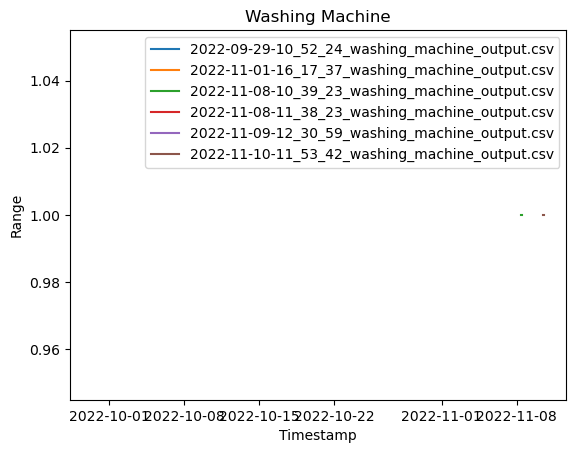

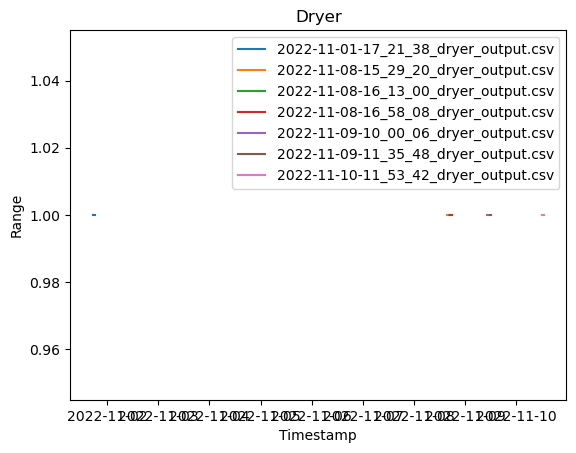

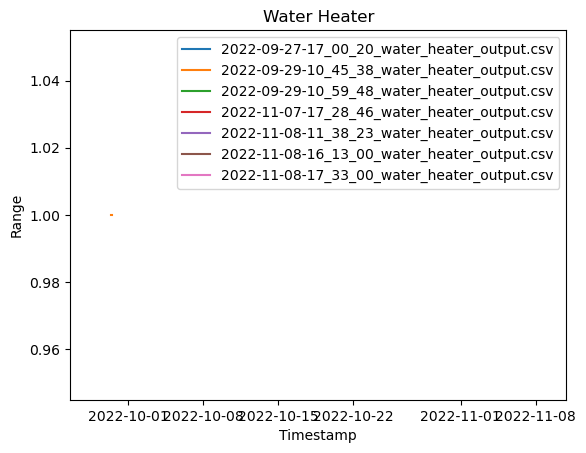

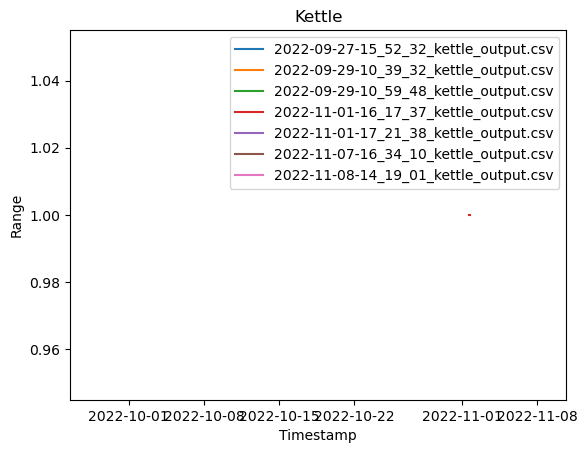

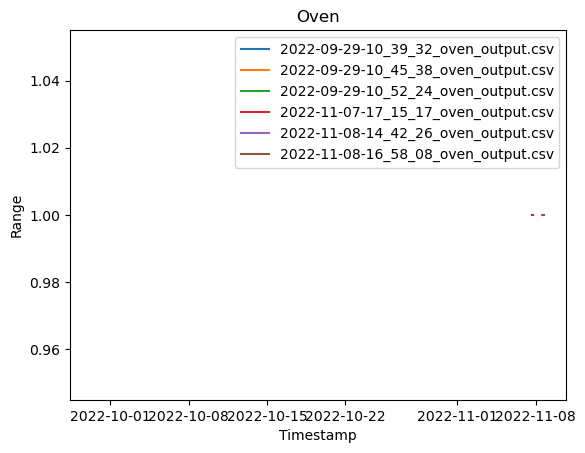

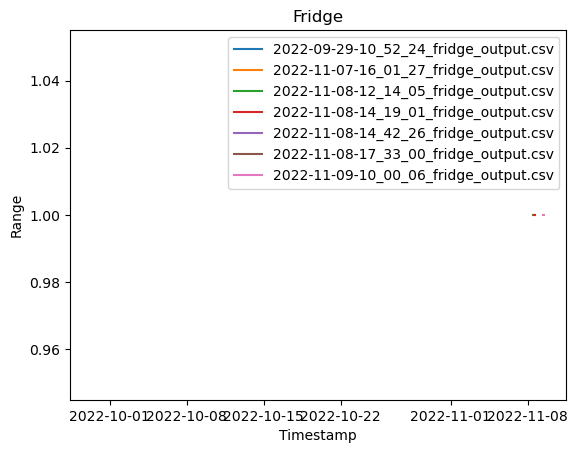

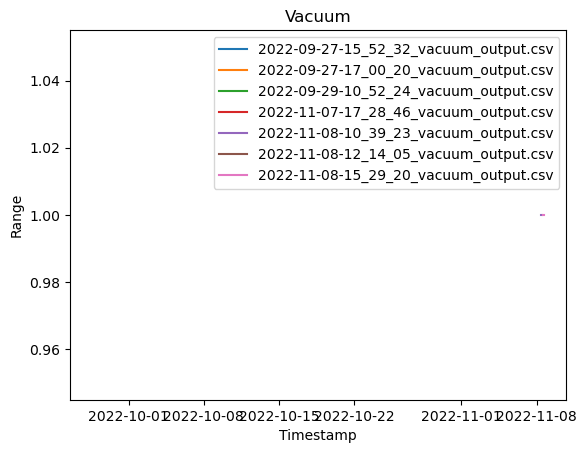

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Path to the folder containing CSV files
ac_folder = 'appliances/ac'
washing_machine_folder = 'appliances/washing_machine'
dryer_folder = 'appliances/dryer'
water_heater_folder = 'appliances/water_heater'
kettle_folder = 'appliances/kettle'
oven_folder = 'appliances/oven'
fridge_folder = 'appliances/fridge'
vacuum_folder = 'appliances/vacuum'

# Function to plot timestamp range for each CSV file
def plot_timestamp_range(folder_path, plot_title):
    # List to store the range of timestamps for each file
    timestamp_ranges = []

    # Iterate through each file in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith('.csv'):
            file_path = os.path.join(folder_path, filename)
            
            # Read the CSV file into a DataFrame
            df = pd.read_csv(file_path)

            # Convert 'Timestamp' column to datetime
            df['Timestamp'] = pd.to_datetime(df['Timestamp'])

            # Get the range of Timestamp for the current file
            timestamp_range = df['Timestamp'].min(), df['Timestamp'].max()
            timestamp_ranges.append(timestamp_range)

            # Plot the range of Timestamp
            plt.plot(timestamp_range, [1, 1], label=filename)

    # Set plot labels and legend
    plt.xlabel('Timestamp')
    plt.ylabel('Range')
    plt.title(plot_title)
    plt.legend()
    plt.show()

# Call the function to plot timestamp ranges
plot_timestamp_range(ac_folder, "Air Conditioner")
plot_timestamp_range(washing_machine_folder, "Washing Machine")
plot_timestamp_range(dryer_folder, "Dryer")
plot_timestamp_range(water_heater_folder, "Water Heater")
plot_timestamp_range(kettle_folder, "Kettle")
plot_timestamp_range(oven_folder, "Oven")
plot_timestamp_range(fridge_folder, "Fridge")
plot_timestamp_range(vacuum_folder, "Vacuum")


In [3]:
# Function to display timestamp range for each CSV file
def display_timestamp_range(folder_path):
    # Create lists to store data
    files = []
    start_timestamps = []
    end_timestamps = []

    # Iterate through each file in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith('.csv'):
            file_path = os.path.join(folder_path, filename)
            
            # Read the CSV file into a DataFrame
            df = pd.read_csv(file_path)

            # Convert 'Timestamp' column to datetime
            df['Timestamp'] = pd.to_datetime(df['Timestamp'])

            # Get the range of Timestamp for the current file
            start_timestamp = df['Timestamp'].min()
            end_timestamp = df['Timestamp'].max()

            # Append the file and its timestamp range to the lists
            files.append(filename)
            start_timestamps.append(start_timestamp)
            end_timestamps.append(end_timestamp)

    # Create a DataFrame from the lists
    result_df = pd.DataFrame({
        'File': files,
        'Start Timestamp': start_timestamps,
        'End Timestamp': end_timestamps
    })

    # Display the result DataFrame
    print(result_df)

# Call the function to display timestamp ranges
display_timestamp_range(ac_folder)
display_timestamp_range(washing_machine_folder)
display_timestamp_range(dryer_folder)
display_timestamp_range(water_heater_folder)
display_timestamp_range(kettle_folder)
display_timestamp_range(oven_folder)
display_timestamp_range(fridge_folder)
display_timestamp_range(vacuum_folder)

                                File     Start Timestamp       End Timestamp
0  2022-11-07-16_01_27_ac_output.csv 2022-11-07 16:01:27 2022-11-07 16:23:18
1  2022-11-07-16_34_10_ac_output.csv 2022-11-07 16:34:10 2022-11-07 16:45:45
2  2022-11-07-17_15_17_ac_output.csv 2022-11-07 17:15:17 2022-11-07 17:32:15
3  2022-11-07-17_28_46_ac_output.csv 2022-11-07 17:28:46 2022-11-07 17:38:45
4  2022-11-09-11_35_48_ac_output.csv 2022-11-09 11:35:48 2022-11-09 12:11:17
5  2022-11-09-12_30_59_ac_output.csv 2022-11-09 12:30:59 2022-11-09 13:19:52
                                             File     Start Timestamp  \
0  2022-09-29-10_52_24_washing_machine_output.csv 2022-09-29 10:52:24   
1  2022-11-01-16_17_37_washing_machine_output.csv 2022-11-01 16:17:37   
2  2022-11-08-10_39_23_washing_machine_output.csv 2022-11-08 10:39:23   
3  2022-11-08-11_38_23_washing_machine_output.csv 2022-11-08 11:38:23   
4  2022-11-09-12_30_59_washing_machine_output.csv 2022-11-09 12:30:59   
5  2022-11-10-11_53_42_

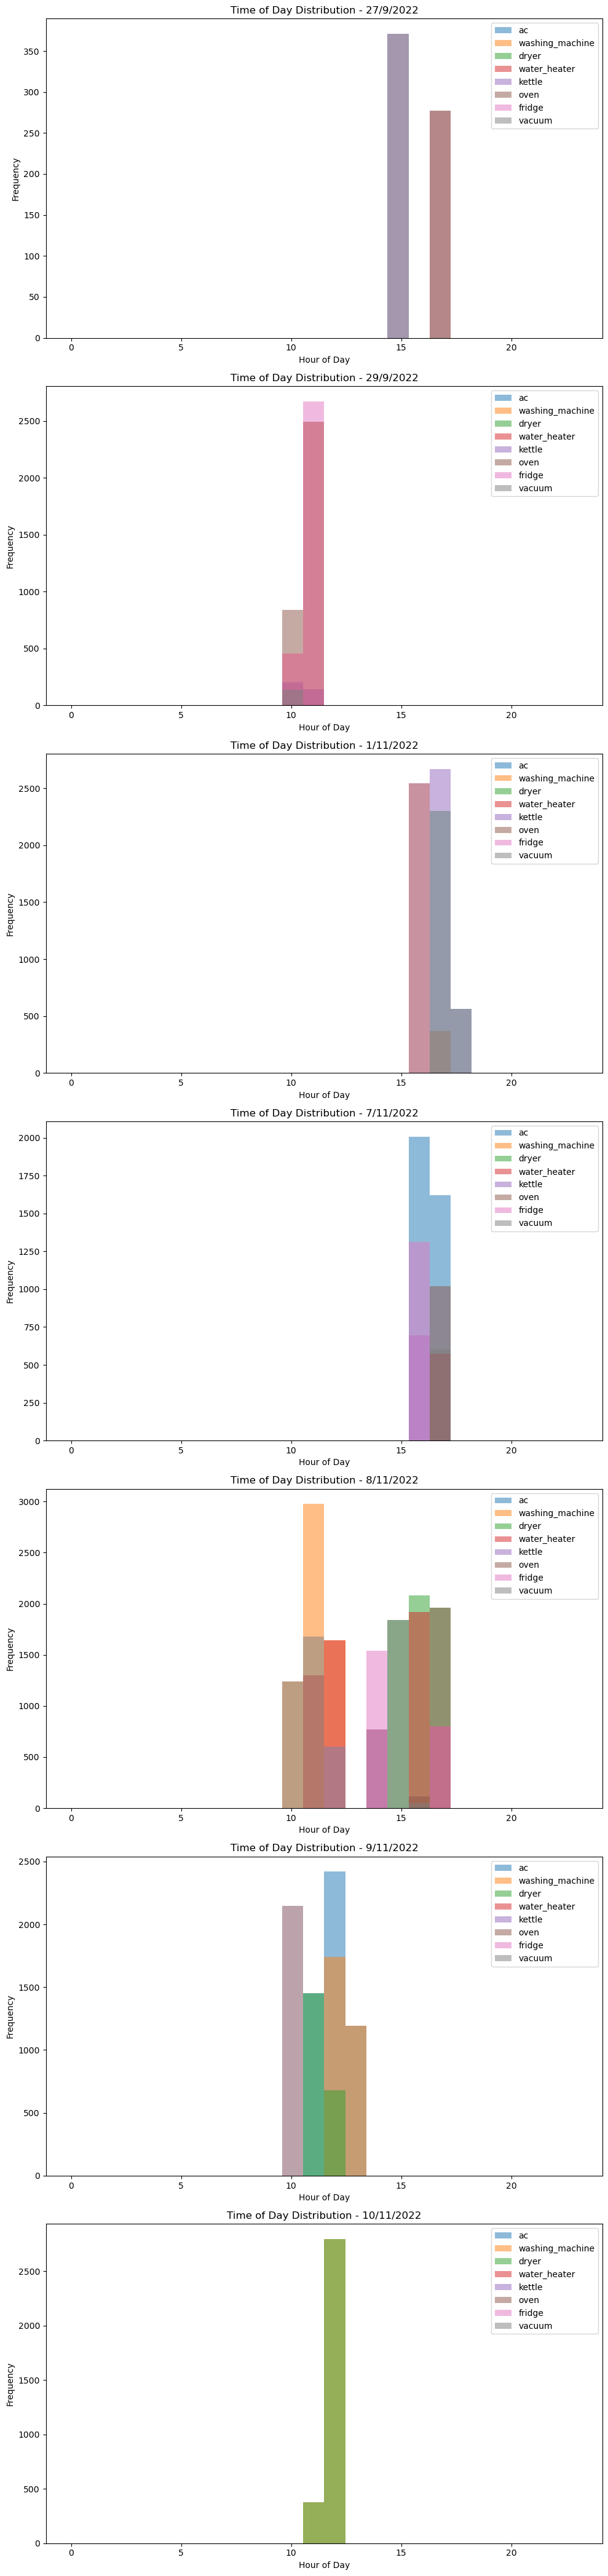

In [16]:
# List of folders containing CSV files
folders = [
    'appliances/ac',
    'appliances/washing_machine',
    'appliances/dryer',
    'appliances/water_heater',
    'appliances/kettle',
    'appliances/oven',
    'appliances/fridge',
    'appliances/vacuum'
]

# List of dates
dates = ['27/9/2022', '29/9/2022', '1/11/2022', '7/11/2022', '8/11/2022', '9/11/2022', '10/11/2022']

# Function to plot time of day for each specified date and folder
def plot_time_of_day_for_folders(folder_paths, dates):
    # Create subplots for each date
    fig, axes = plt.subplots(len(dates), 1, figsize=(10, 6 * len(dates)))

    # Iterate through each date
    for i, date in enumerate(dates):
        # Parse the date
        parsed_date = pd.to_datetime(date, format='%d/%m/%Y').date()

        # Create empty list to store hour values for each folder
        hour_values_by_folder = []

        # Iterate through each folder path
        for folder_path in folder_paths:
            # Create empty list to store hour values for the current folder
            hour_values = []

            # Iterate through each file in the folder
            for filename in os.listdir(folder_path):
                if filename.endswith('.csv'):
                    file_path = os.path.join(folder_path, filename)
                    
                    # Read the CSV file into a DataFrame
                    df = pd.read_csv(file_path)

                    # Convert 'Timestamp' column to datetime
                    df['Timestamp'] = pd.to_datetime(df['Timestamp'])

                    # Filter the DataFrame for the current date
                    df_date = df[df['Timestamp'].dt.date == parsed_date]

                    # Extract hour values from timestamps and append to the list
                    hour_values.extend(df_date['Timestamp'].dt.hour)

            # Append hour values for the current folder to the list
            hour_values_by_folder.append(hour_values)

        # Plot histogram of hour values for each folder for the current date
        for hour_values, folder_path in zip(hour_values_by_folder, folder_paths):
            axes[i].hist(hour_values, bins=24, range=(0, 23), alpha=0.5, label=os.path.basename(folder_path))

        axes[i].set_title(f'Time of Day Distribution - {date}')
        axes[i].set_xlabel('Hour of Day')
        axes[i].set_ylabel('Frequency')
        axes[i].legend()

    # Adjust layout and display plot
    plt.tight_layout()
    plt.show()

# Call the function to plot time of day for each specified date and folder
plot_time_of_day_for_folders(folders, dates)